In [1]:
import pandas as pd
from typing import Protocol as Protocol
import matplotlib.pyplot as plt
import datetime
from datetime import datetime
import calendar
from pylab import rcParams
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.layers import LSTM
from kerastuner.engine.hyperparameters import HyperParameters
from scikeras.wrappers import KerasRegressor
from sklearn.preprocessing import StandardScaler
import statsmodels as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, acf, pacf
from statsmodels.tsa import api as smt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import keras_tuner as kt
from keras_tuner import RandomSearch

2023-07-04 19:46:20.658319: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-04 19:46:21.516164: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-07-04 19:46:21.516264: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-07-04 19:46:21.633999: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-07-04 19:46:23.940648: W tensorflow/stream_executor/platform/de

### Serie historica PP y EMAE

In [27]:
_df1 = pd.read_csv('~/MEGA/Tesis/Bases de datos/Serie Historica PP_EMAE.csv')
_df1

,mes,pmp,pm,cob_tarifaria,serie_orig,serie_des,var_porc
0,2019-01,1606.173117,2388.067555,0.672583,134.536237,142.915815,0.555684
1,2019-02,2177.607354,2677.833304,0.813198,132.267888,143.200191,0.198981
2,2019-03,2177.307215,2834.831688,0.768055,144.963258,141.403699,-1.254532
3,2019-04,2164.277546,3037.072498,0.712620,149.916232,142.701997,0.918150
4,2019-05,2207.995611,3001.969625,0.735516,164.135704,144.581499,1.317082
5,2019-06,2199.232959,3358.514899,0.654823,150.858957,143.614347,-0.668932
6,2019-07,2171.085405,3421.409631,0.634559,146.776981,145.289773,1.166615
7,2019-08,2244.612155,4005.069225,0.560443,141.276914,144.899110,-0.268886
8,2019-09,2276.636836,4188.478780,0.543547,134.877135,140.993591,-2.695336
9,2019-10,2275.314514,3944.443503,0.576840,141.639556,143.737170,1.945889


### Demanda del SADI (Sistema Argentino de Interconexión)

In [30]:
_dem=pd.read_csv('~/MEGA/Tesis/Bases de datos/Demanda Horaria por Tipo.csv')
_dem

,año,mes,dia,fecha,demanda_total,estacion,tipo_dia,potencia_pico,hora_potencia_pico,temperatura_media,estado_tiempo
0,2019,2019-01,Martes,2019-01-01 00:00:00,18191.992,VERANO,FERIADO,19964.0,22:45,28.1,SN
1,2019,2019-01,Martes,2019-01-01 01:00:00,13496.711,VERANO,FERIADO,19964.0,22:45,28.1,SN
2,2019,2019-01,Martes,2019-01-01 02:00:00,13362.545,VERANO,FERIADO,19964.0,22:45,28.1,SN
3,2019,2019-01,Martes,2019-01-01 03:00:00,13297.589,VERANO,FERIADO,19964.0,22:45,28.1,SN
4,2019,2019-01,Martes,2019-01-01 04:00:00,13128.633,VERANO,FERIADO,19964.0,22:45,28.1,SN
...,...,...,...,...,...,...,...,...,...,...,...
35059,2022,2022-12,Sábado,2022-12-31 19:00:00,17883.252,VERANO,SÁBADO,21630.0,15:11,27.8,SN
35060,2022,2022-12,Sábado,2022-12-31 20:00:00,17098.675,VERANO,SÁBADO,21630.0,15:11,27.8,SN
35061,2022,2022-12,Sábado,2022-12-31 21:00:00,17474.474,VERANO,SÁBADO,21630.0,15:11,27.8,SN
35062,2022,2022-12,Sábado,2022-12-31 22:00:00,17105.109,VERANO,SÁBADO,21630.0,15:11,27.8,SN


## Gráficos

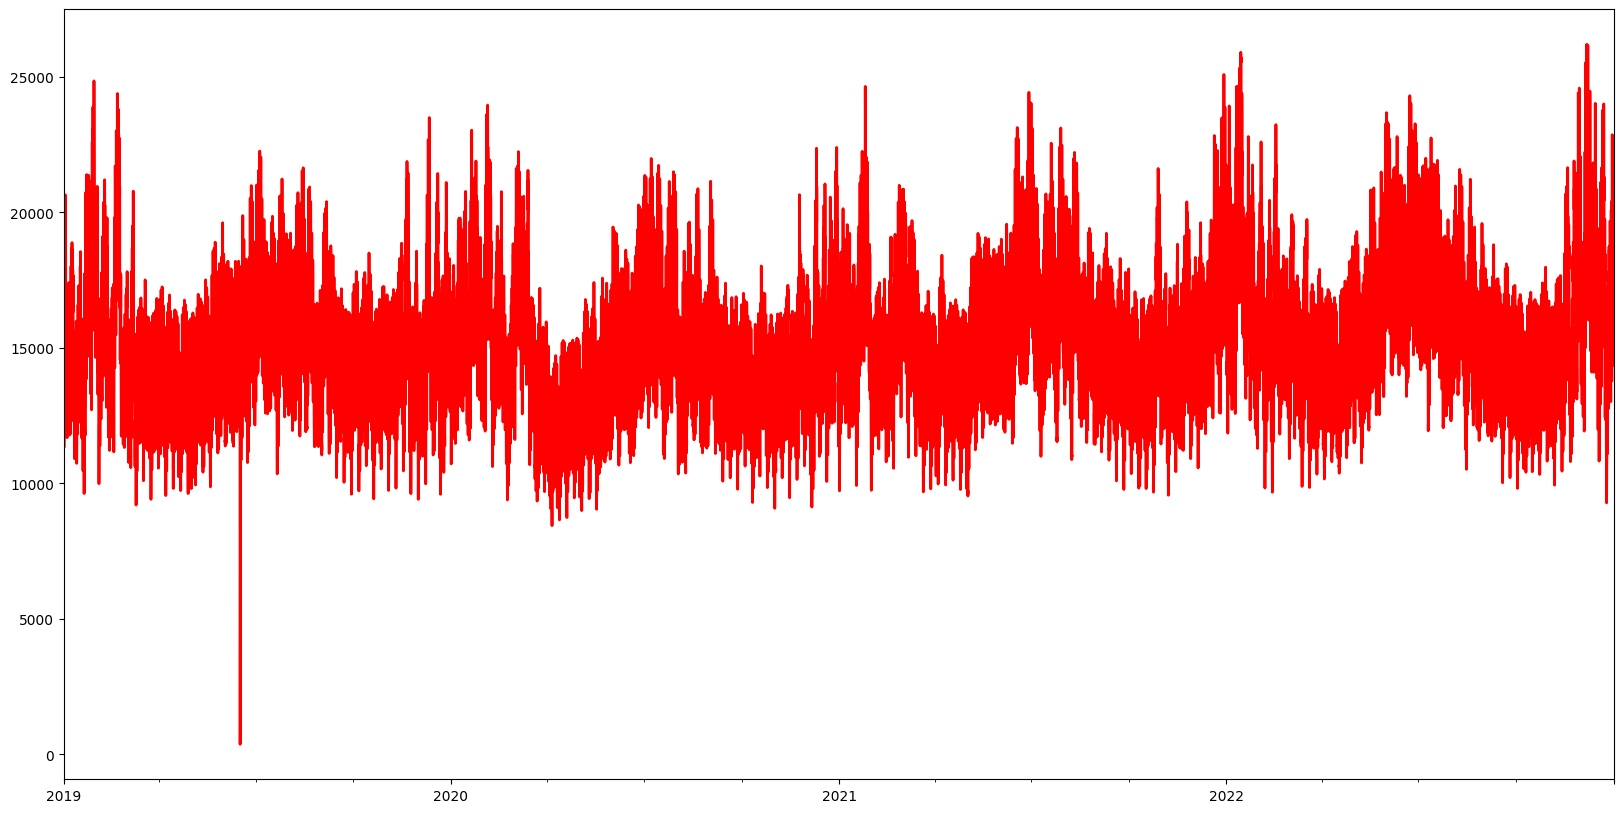

In [15]:
df = _dem[['demanda_total']].to_numpy()
dates = pd.date_range(_dem['fecha'].min(),_dem['fecha'].max(), freq = 'H')
df = pd.DataFrame(df, index = dates, columns = ['demanda'])
plt.figure(figsize = (20,10))
df.demanda.plot(label='demanda', linewidth=2, c = 'red')
plt.savefig('Demanda por Hora.pdf')
plt.show()

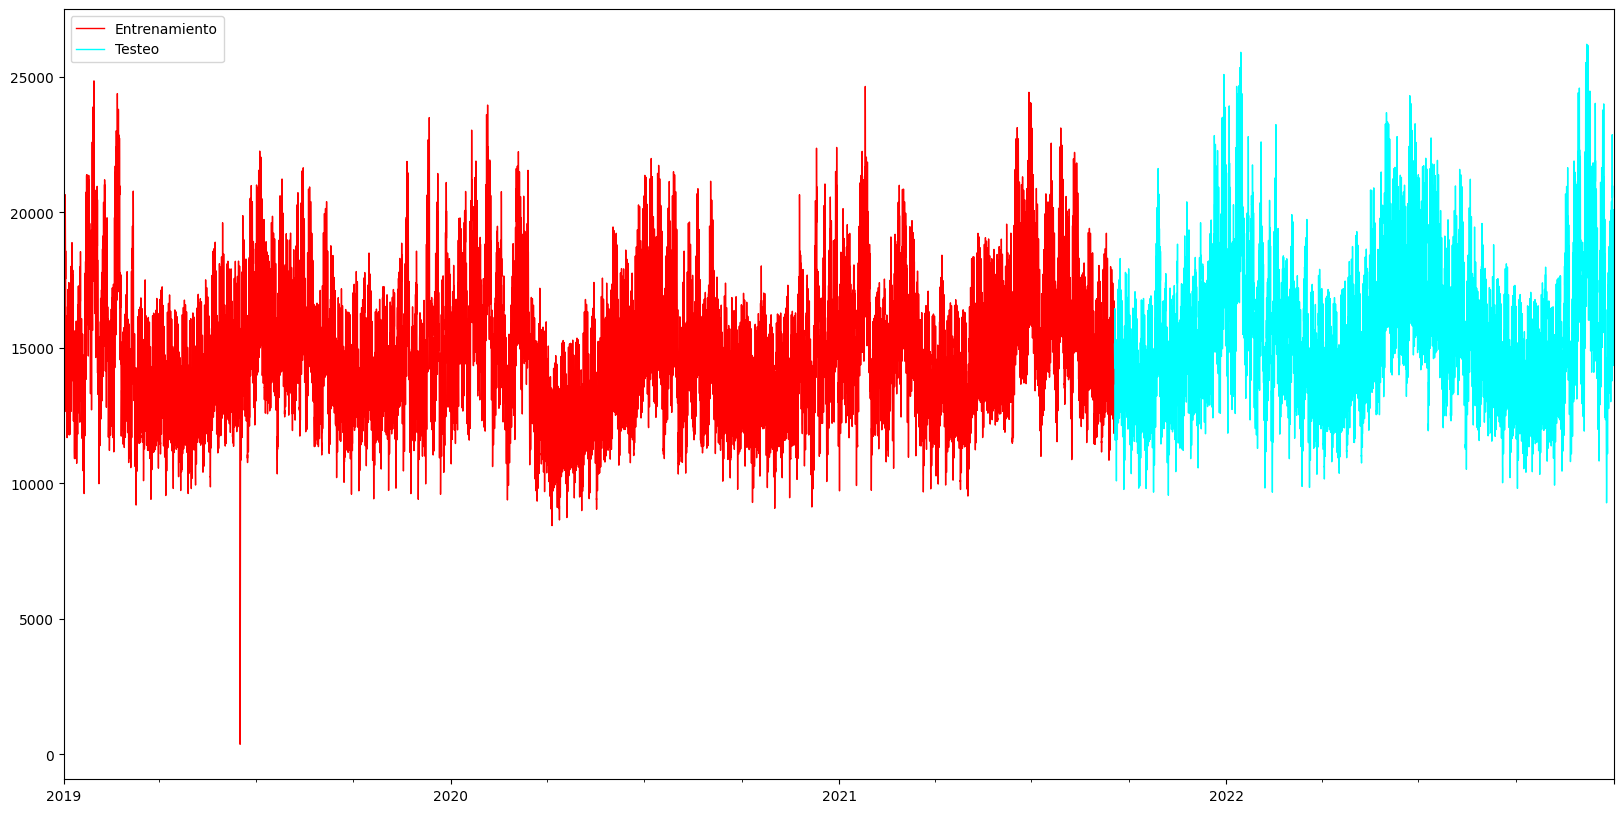

In [16]:
train_size = int(len(df)*0.678)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size, :], df.iloc[train_size:len(df), :]
fig, ax = plt.subplots(figsize=(20, 10))
train.demanda.plot(ax=ax, label='Entrenamiento', linewidth=1, c = 'red')
test.demanda.plot(ax=ax, label='Testeo', linewidth=1, c = 'cyan')
plt.savefig('Demanda_train_test.pdf')
ax.legend()

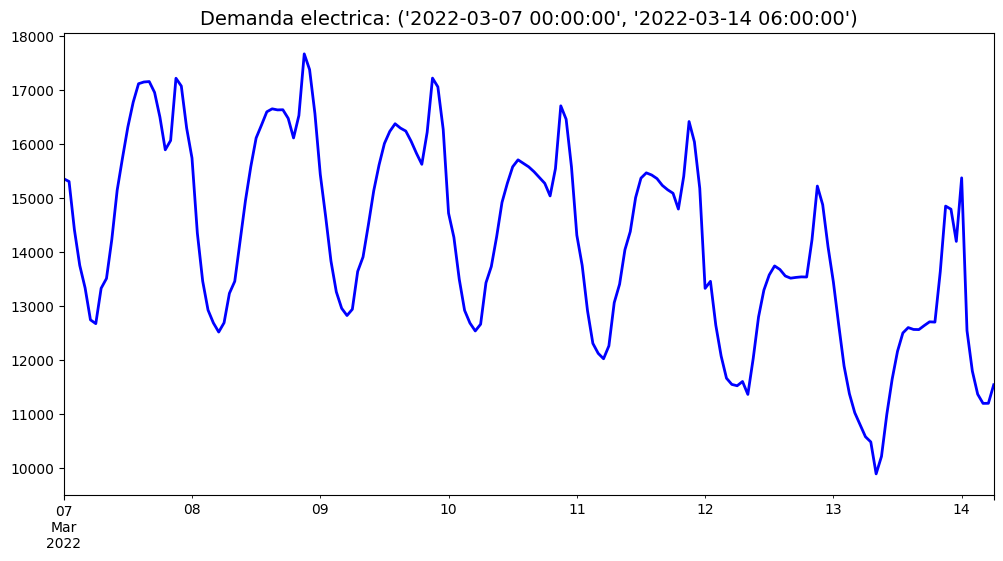

In [17]:
zoom_aux = ('2022-03-07 00:00:00', '2022-03-14 06:00:00')

plt.figure(figsize=(12, 6))

df.loc[zoom_aux[0]: zoom_aux[1]].demanda.plot(color='blue', linewidth=2)

plt.title(f'Demanda electrica: {zoom_aux}', fontsize=14)
plt.savefig('Demanda_semana.pdf')
plt.show()

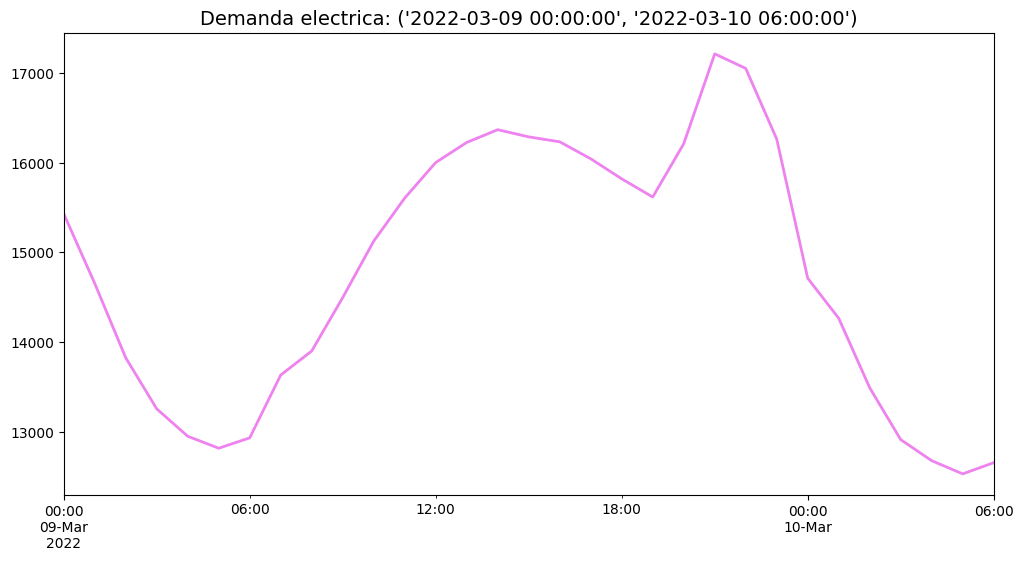

In [18]:
zoom = ('2022-03-09 00:00:00', '2022-03-10 06:00:00')

plt.figure(figsize=(12, 6))

df.loc[zoom[0]: zoom[1]].demanda.plot(color='violet', linewidth=2)

plt.title(f'Demanda electrica: {zoom}', fontsize=14)
plt.savefig('Demanda_dia.pdf')
plt.show()

## Estadísticas

### Serie desestacionalizada

In [19]:
df = _dem[['demanda_total']].to_numpy()
dates = pd.date_range(_dem['fecha'].min(),_dem['fecha'].max(), freq = 'H')
df = pd.DataFrame(df, index = dates, columns = ['demanda'])

<Figure size 4000x1600 with 0 Axes>

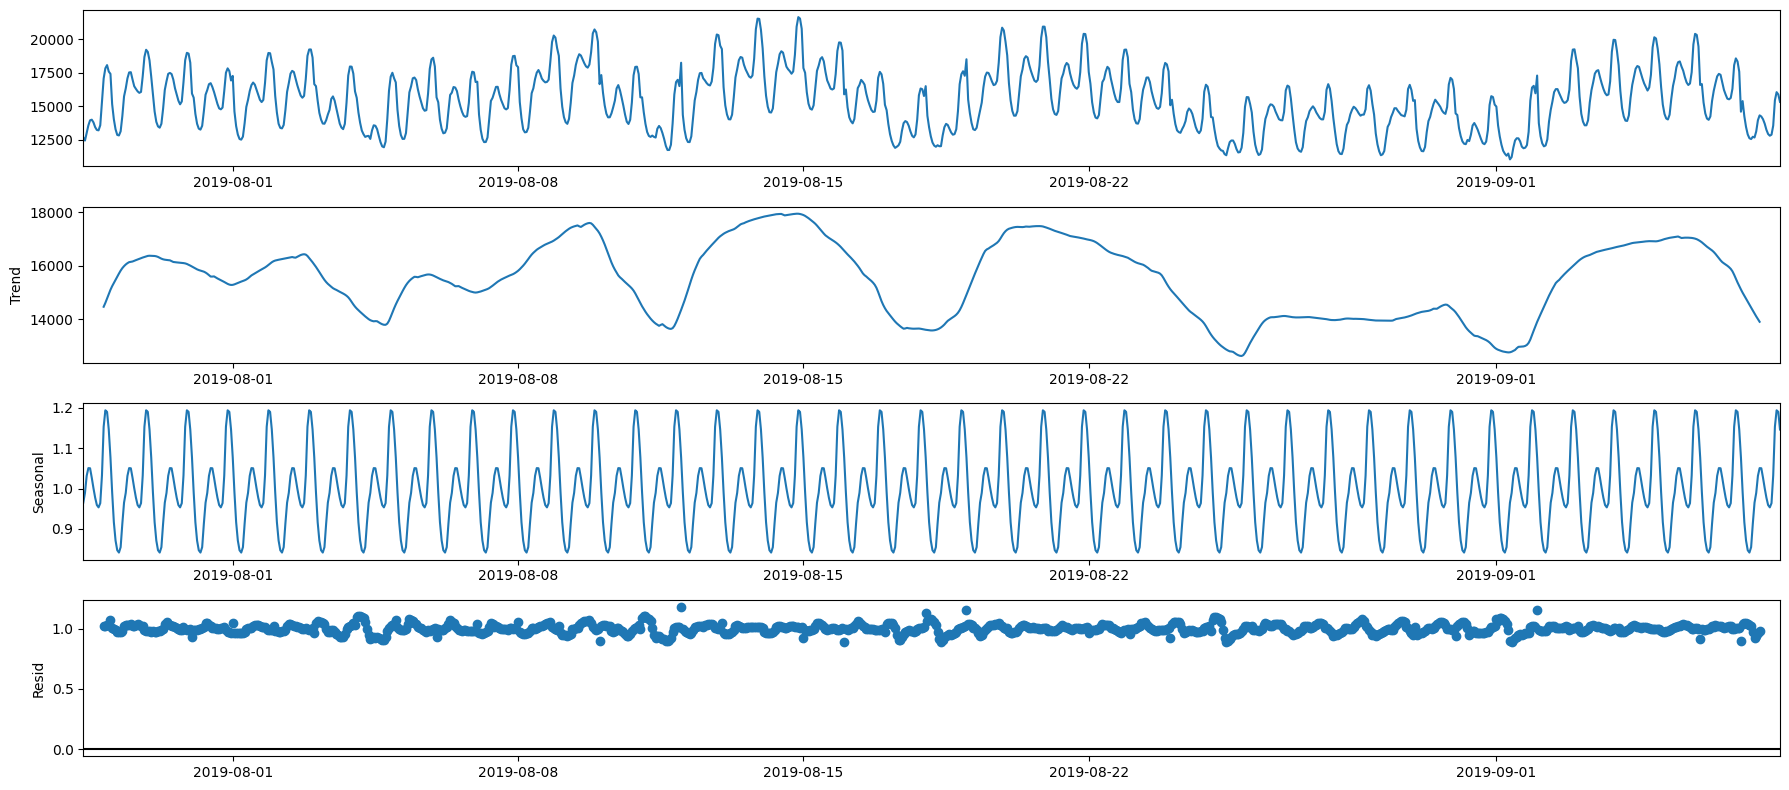

In [20]:
X_des = df[5000:6000]
rcParams['figure.figsize'] = 18, 8
plt.figure(num=None, figsize=(50, 20), dpi=80, facecolor='w', edgecolor='k')
decomposition = seasonal_decompose(X_des, model = 'multiplicative')
decomposition.plot()
plt.show()

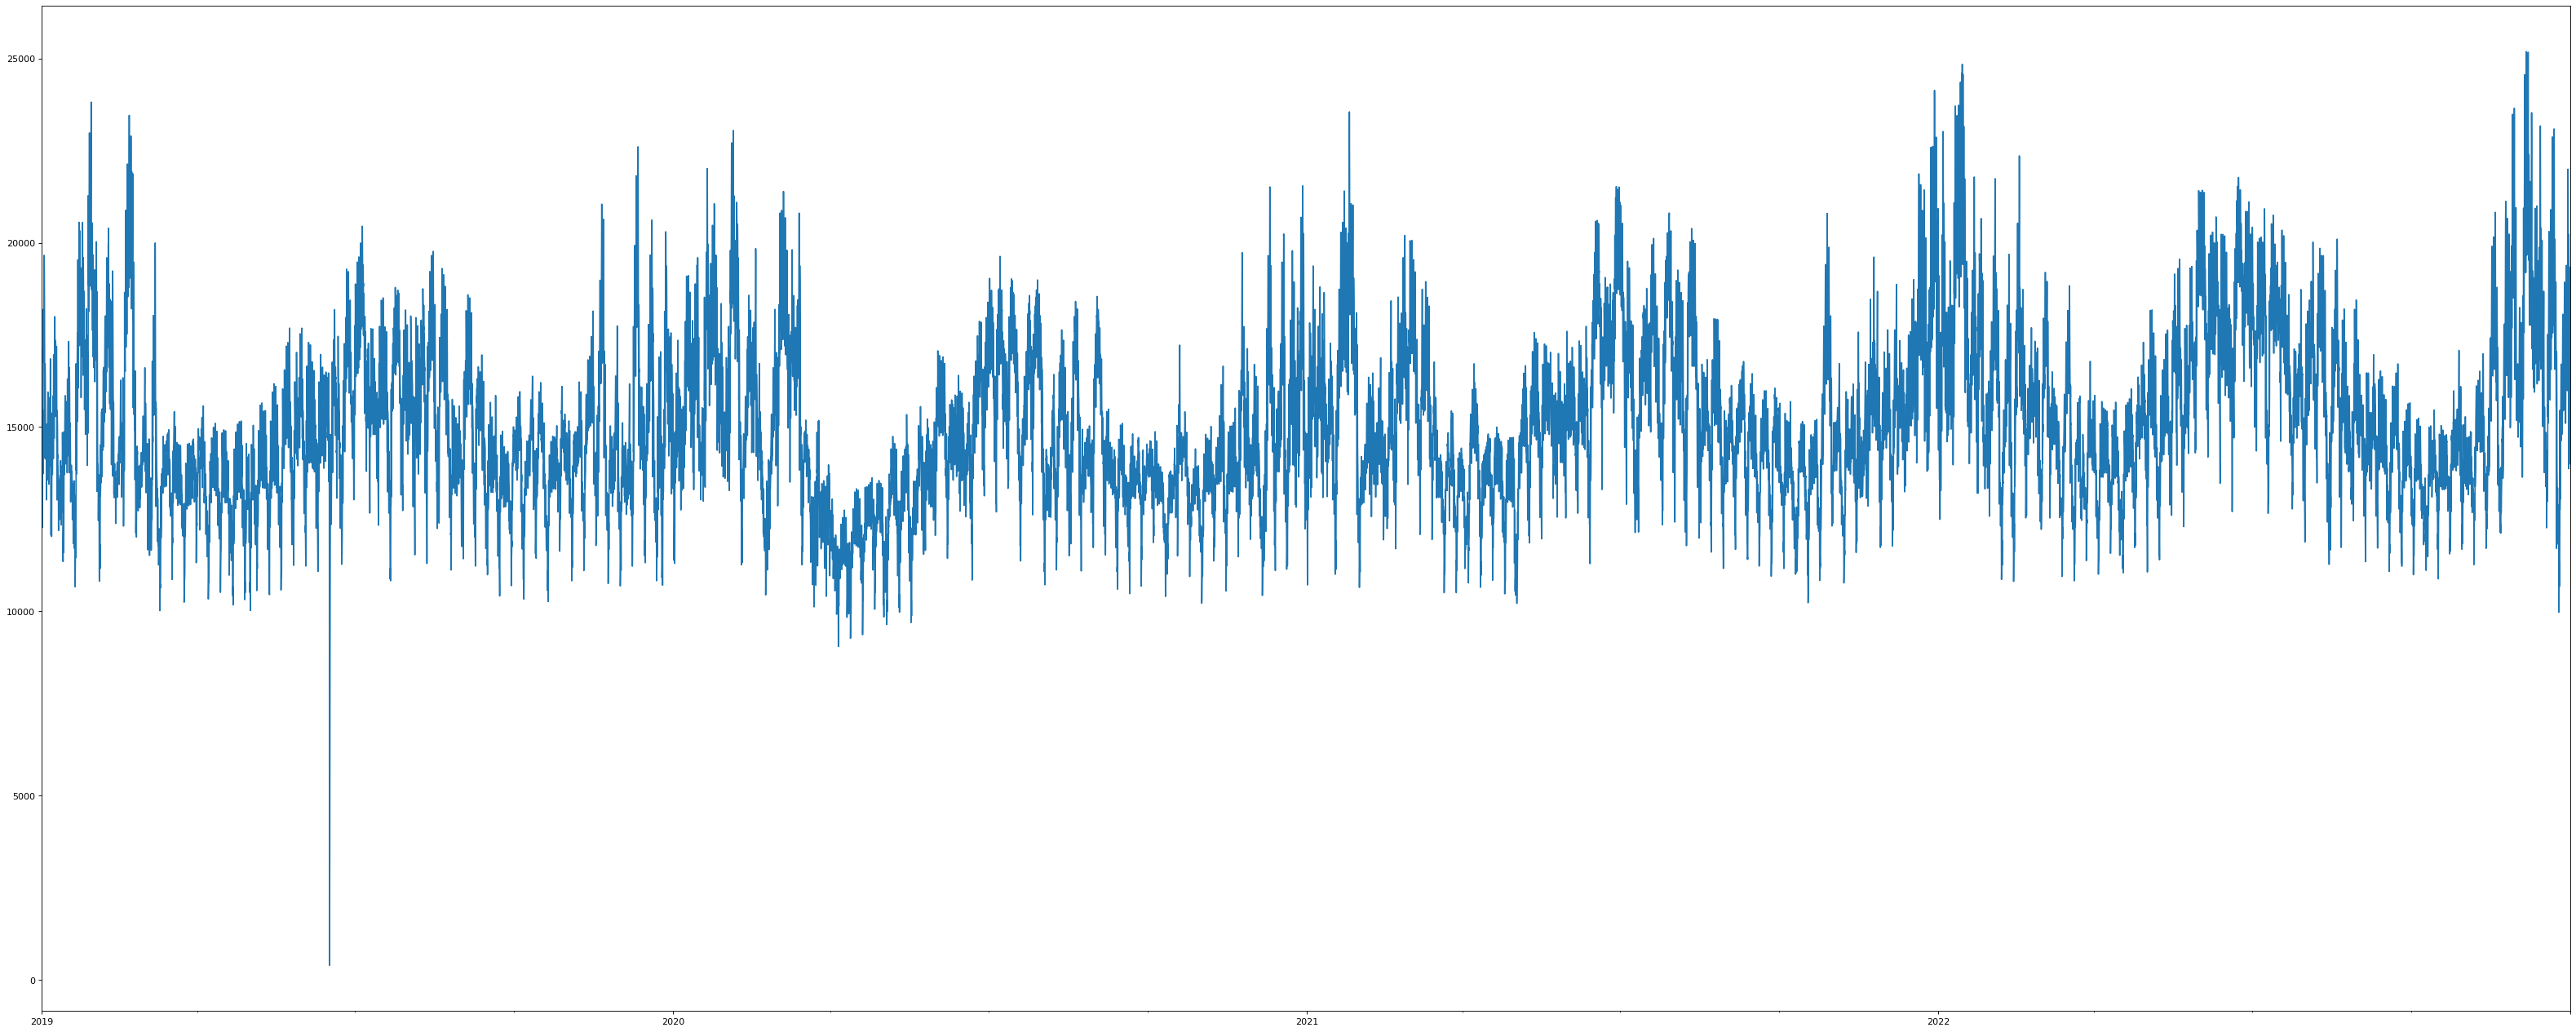

In [21]:
rcParams['figure.figsize'] = 18, 8
plt.figure(num=None, figsize=(50, 20), dpi=80, facecolor='w', edgecolor='k')
deseasonalized = seasonal_decompose(df['demanda'], model = 'multiplicative')
dem_deseasonalized = deseasonalized.observed / deseasonalized.seasonal
dem_deseasonalized.plot()
plt.savefig('Demanda_deses.pdf')
plt.show()

In [22]:
# ADF Test
result = adfuller(dem_deseasonalized, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -12.929411903361318
p-value: 3.7279416659737104e-24
Critial Values:
   1%, -3.43053678680168
Critial Values:
   5%, -2.861622555151452
Critial Values:
   10%, -2.5668139415123283


Hay evidencia estadística suficiente para rechazar la hipótesis nula sobre la existencia de raíz unitaria en la serie. 

In [23]:
_df1= _df1[_df1['mes']>='2019-01']
_reg = _df1.merge(_dem, on = 'mes', how = 'left')

In [24]:
_ot_19 = pd.date_range('2019-03-21 00:00:00','2019-06-20 23:00:00', freq = 'H')
_ot_20 = pd.date_range('2020-03-21 00:00:00','2020-06-20 23:00:00', freq = 'H')
_ot_21 = pd.date_range('2021-03-21 00:00:00','2021-06-20 23:00:00', freq = 'H')
_ot_22 = pd.date_range('2022-03-21 00:00:00','2022-06-20 23:00:00', freq = 'H')

_spr_19 = pd.date_range('2019-09-21 00:00:00','2019-12-20 23:00:00', freq = 'H')
_spr_20 = pd.date_range('2020-09-21 00:00:00','2020-12-20 23:00:00', freq = 'H')
_spr_21 = pd.date_range('2021-09-21 00:00:00','2021-12-20 23:00:00', freq = 'H')
_spr_22 = pd.date_range('2022-09-21 00:00:00','2022-12-20 23:00:00', freq = 'H')


In [25]:
_mean = _reg[_reg['fecha']>='2022-03-14 20:00:00'].mean()
_mean
_reg.groupby('año').mean()

/tmp/ipykernel_116138/190181544.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  _mean = _reg[_reg['fecha']>='2022-03-14 20:00:00'].mean()
/tmp/ipykernel_116138/190181544.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  _mean = _reg[_reg['fecha']>='2022-03-14 20:00:00'].mean()
/tmp/ipykernel_116138/190181544.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  _reg.groupby('año').mean()


,pmp,pm,cob_tarifaria,serie_orig,serie_des,var_porc,demanda_total,potencia_pico
año,,,,,,,,
2019,2171.080560,3373.267700,0.655296,142.981169,142.905827,-0.069945,14719.869637,18831.854795
2020,2246.798513,4163.831892,0.544476,128.712804,128.679215,-0.025731,14493.048480,18575.945355
2021,2547.547855,6880.981480,0.377964,142.163327,142.097543,0.818130,15282.736045,19405.975342
2022,4660.944500,11603.213993,0.413078,149.512673,149.446972,-0.113982,15839.618893,20123.479455


In [26]:
_reg['estacion'] = np.where(_reg['fecha'].isin(_ot_19)|_reg['fecha'].isin(_ot_20)|_reg['fecha'].isin(_ot_21)|_reg['fecha'].isin(_ot_22), 'OTOÑO',_reg['estacion'])
_reg['estacion'] = np.where(_reg['fecha'].isin(_spr_19)|_reg['fecha'].isin(_spr_20)|_reg['fecha'].isin(_spr_21)|_reg['fecha'].isin(_spr_22), 'PRIMAVERA',_reg['estacion'])

In [27]:
_reg['demanda'] = dem_deseasonalized.values
_reg['temperatura_media'] = np.where(_reg['temperatura_media']=='17,4', 17.4, _reg['temperatura_media'])
_reg['temperatura_media'] = _reg['temperatura_media'].astype(float)
_reg_aux = _reg.drop(columns = ['demanda_total', 'dia', 'mes', 'fecha'])

In [28]:
_reg_aux.groupby(['estacion', 'año'])['demanda'].describe()

count          mean          std           min           25%  \
estacion  año                                                                   
INVIERNO  2019  2208.0  15504.483812  1750.404186  10826.775270  14258.302832   
          2020  2208.0  15137.830528  1816.214607  10478.985681  13765.030064   
          2021  2208.0  16014.687273  2039.979098  11162.492699  14620.667215   
          2022  2208.0  16256.108772  2080.896870  11081.634118  14703.160575   
OTOÑO     2019  2208.0  13765.268610  1505.231566    395.567509  13063.307494   
          2020  2208.0  12917.299910  1439.797215   9045.743820  11944.983745   
          2021  2208.0  14514.460932  1701.325992  10214.596329  13490.908088   
          2022  2208.0  15461.679469  2045.157439  11006.557717  14094.252721   
PRIMAVERA 2019  2184.0  14375.820525  1772.703874  10265.385490  13381.923673   
          2020  2184.0  13938.504031  1478.076083  10217.592310  13173.967635   
          2021  2184.0  14658.188792  1646.308063  10230.401317  13680.994591   
          2022  2184.0  15365.463791  2545.239796  10881.325817  13694.792827   
VERANO    2019  2160.0  15257.162942  2465.624520  10020.281506  13568.430598   
          2020  2184.0  15962.147634  2157.171661  10444.746237  14406.690589   
          2021  2160.0  15942.647000  2192.847476  10647.761389  14280.440161   
          2022  2160.0  16294.422557  2544.223102   9976.276645  14696.430193   

                         50%           75%           max  
estacion  año                                             
INVIERNO  2019  15562.129963  16749.501925  20445.822190  
          2020  15031.469934  16610.119908  19630.312130  
          2021  15885.371922  17470.964482  21525.032222  
          2022  16175.189776  17843.847357  21771.088592  
OTOÑO     2019  13807.257071  14640.577389  18185.241740  
          2020  12789.043880  13851.951064  17067.715004  
          2021  14482.269162  15465.579288  20608.092948  
          2022  15133.017100  16836.202750  21422.963903  
PRIMAVERA 2019  14215.365365  15050.403339  22603.495701  
          2020  13780.106395  14508.912944  21516.278447  
          2021  14624.069672  15624.930757  21868.010408  
          2022  14647.172579  16679.545637  25186.770217  
VERANO    2019  14647.470077  16809.689439  23814.281118  
          2020  15833.955096  17434.897143  23048.034610  
          2021  15701.787618  17294.882988  24133.264477  
          2022  16027.894997  17746.646074  24840.655534

In [29]:
_reg_aux.groupby(['tipo_dia', 'año'])['demanda'].describe()

count          mean          std           min           25%  \
tipo_dia año                                                                   
DOMINGO  2019  1200.0  12833.552281  1840.439748    395.567509  11677.988368   
         2020  1248.0  13054.858527  1885.107317   9045.743820  11653.475451   
         2021  1224.0  13557.584718  1897.158585  10214.596329  12108.269561   
         2022  1224.0  14015.329368  2114.976837   9976.276645  12473.895144   
FERIADO  2019   456.0  13659.737412  1635.919330  10022.527915  12513.356674   
         2020   456.0  13282.569660  1604.798334   9836.571227  12118.790574   
         2021   432.0  14070.677129  1673.993087  10439.227049  12911.964309   
         2022   480.0  14937.354066  2601.055819  11067.283764  12863.583176   
HÁBIL    2019  5904.0  15341.766207  1843.751805  11722.082894  13970.026526   
         2020  5832.0  15005.969021  2019.303534  10555.549470  13558.861850   
         2021  5904.0  15879.500789  1856.526028  11860.492233  14522.250464   
         2022  5832.0  16440.606175  2161.426594  12280.264921  14739.415116   
SÁBADO   2019  1200.0  13977.488873  1562.800271  11256.028804  12840.962412   
         2020  1248.0  13929.987747  1793.099215   9920.483676  12651.947808   
         2021  1200.0  14526.976839  1615.426370  11698.210937  13277.612831   
         2022  1224.0  15180.305368  2117.979925  11707.632999  13463.561349   

                        50%           75%           max  
tipo_dia año                                             
DOMINGO  2019  12616.709728  13764.577453  18419.346930  
         2020  12763.686718  14198.791046  18785.891845  
         2021  13224.367931  14793.528388  19995.517322  
         2022  13484.712737  15313.554881  21734.891102  
FERIADO  2019  13602.726686  14766.736360  18056.802240  
         2020  13162.976495  14318.510485  17580.706734  
         2021  13911.079472  15159.052512  18466.835799  
         2022  14050.442493  16565.780410  23529.447922  
HÁBIL    2019  14866.589816  16362.476433  23814.281118  
         2020  14529.651233  16442.612865  23048.034610  
         2021  15517.448313  16919.077275  24133.264477  
         2022  15992.437860  17861.091885  25186.770217  
SÁBADO   2019  13628.173573  14963.576055  19480.000270  
         2020  13778.638774  15089.342749  19661.063936  
         2021  14257.248256  15441.970546  20400.026676  
         2022  14788.707091  16538.560660  24562.549988

In [30]:
for x in ['var_porc', 'pmp', 'cob_tarifaria', 'temperatura_media', 'demanda', 'potencia_pico', 'serie_des', 'serie_orig']:
    result = adfuller(_reg_aux[x], autolag='AIC')
    print(f'ADF Statistic {x}: {result[0]}')
    print(f'p-value {x}: {result[1]}')

ADF Statistic var_porc: -4.592551922123915
p-value var_porc: 0.00013331486067590367
ADF Statistic pmp: 1.5660661792853785
p-value pmp: 0.9977521147907561
ADF Statistic cob_tarifaria: -1.910789362718421
p-value cob_tarifaria: 0.3270026013750833
ADF Statistic temperatura_media: -7.200247416467086
p-value temperatura_media: 2.3758110426889903e-10
ADF Statistic demanda: -12.929411903361318
p-value demanda: 3.7279416659737104e-24
ADF Statistic potencia_pico: -11.427348718706368
p-value potencia_pico: 6.645337134758475e-21
ADF Statistic serie_des: -1.6241006249371621
p-value serie_des: 0.4705801600359524
ADF Statistic serie_orig: -2.447562198509646
p-value serie_orig: 0.12875965553185836


In [31]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
_reg_aux['tipo_dia'] = le.fit_transform(_reg_aux['tipo_dia'])
_reg_aux['estado_tiempo'] = le.fit_transform(_reg_aux['estado_tiempo'])
_reg_aux['hora_potencia_pico'] = le.fit_transform(_reg_aux['hora_potencia_pico'])
_reg_aux['estacion'] = le.fit_transform(_reg_aux['estacion'])

In [32]:
_corr = _reg_aux.drop(columns = ['serie_orig', 'estacion', 'tipo_dia', 'hora_potencia_pico', 'estado_tiempo', 'serie_des'])
_corr = _corr.rename(columns={'var_porc':'Variación EMAE', 'serie_des':'Serie EMAE','pmp':'Precio','potencia_pico':'Pico de Potencia', 'temperatura_media':'Temperatura Media','demanda':'Demanda', 'cob_tarifaria':'Cobertura Tarifaria'})
_corr = _corr.corr()

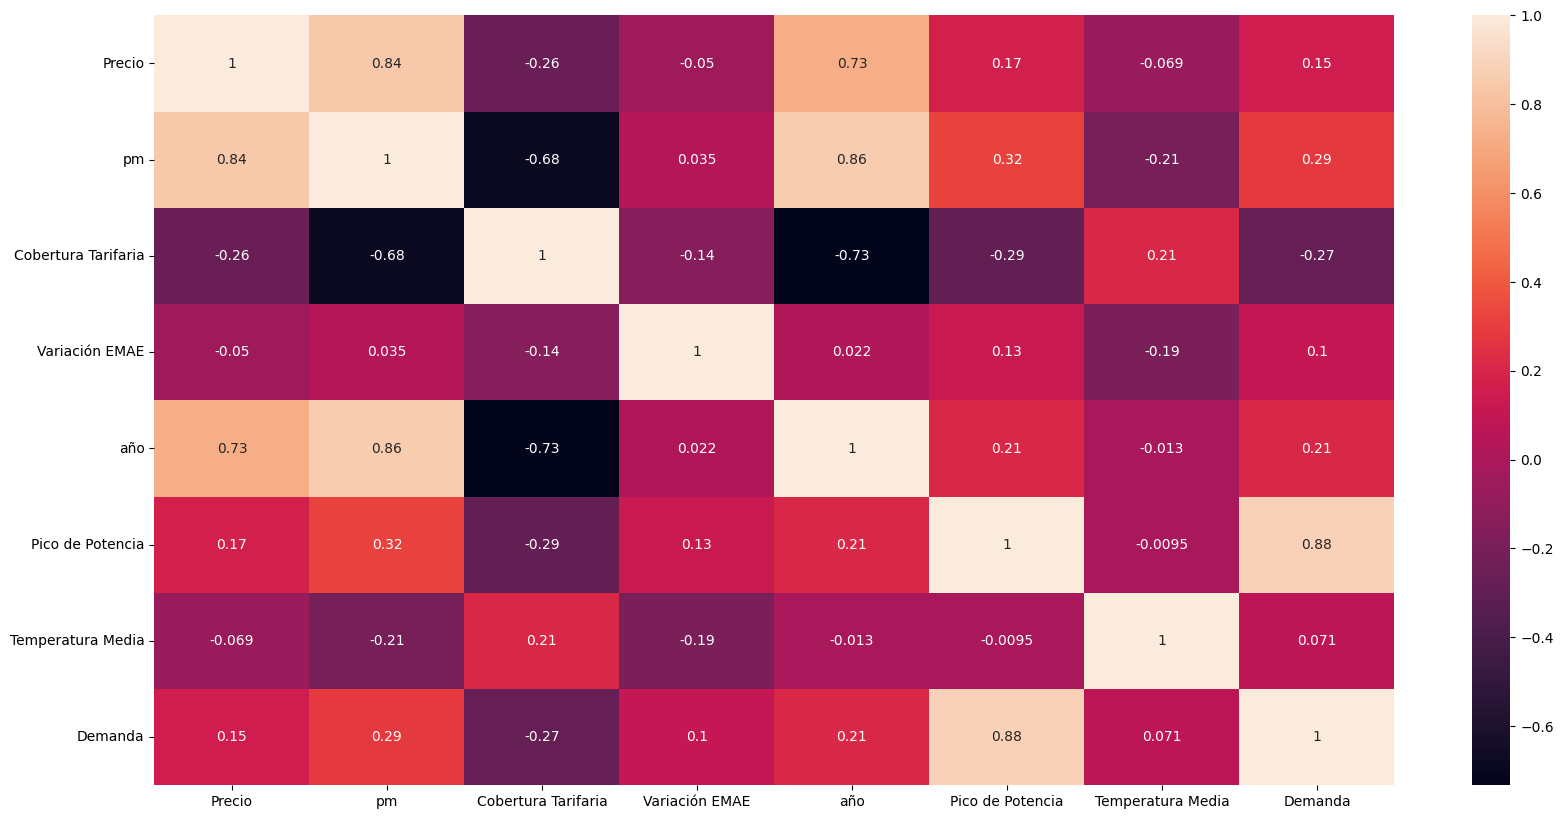

In [33]:
import seaborn as sns
plt.figure(figsize=(20, 10))
sns.heatmap(_corr, annot=True)
plt.savefig('corr.pdf')
plt.show()

In [34]:
_group1 = _reg_aux[_reg_aux['tipo_dia'].isin([0, 1, 3])]
_group2 = _reg_aux[_reg_aux['tipo_dia']==2]
_group1 = _group1['demanda']
_group2 = _group2['demanda']

In [35]:
import scipy.stats as stats

t_stat, p_value = stats.ttest_ind(_group1, _group2)

# Print the results
print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: -76.52380661914012
p-value: 0.0


In [36]:
group1 = _reg_aux[_reg_aux['estacion'].isin([0,3])] #Verano e invierno 
group2 = _reg_aux[_reg_aux['estacion'].isin([1,2])] #Primavera y otoño
group1 = group1['demanda']
group2 = group2['demanda']

In [37]:
import scipy.stats as stats

t_stat, p_value = stats.ttest_ind(group1, group2)

# Print the results
print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: 64.12464530816547
p-value: 0.0


In [38]:
grupo1 = _reg_aux[_reg_aux['estado_tiempo']==0]['demanda']
grupo2 = _reg_aux[_reg_aux['estado_tiempo'].isin([1, 2])]['demanda']

In [39]:
import scipy.stats as stats

t_stat, p_value = stats.ttest_ind(grupo1, grupo2)

# Print the results
print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: -4.732819798765182
p-value: 2.222850864287894e-06


In [40]:
_cols = ['potencia_pico', 'var_porc', 'serie_des', 'pmp', 'temperatura_media', 'cob_tarifaria']
for i in _cols:
    if i != 'demanda':
        corr, p_value = stats.kendalltau(_reg_aux['demanda'], _reg_aux[i])
        corr_spearman, pvalue_spearman = stats.spearmanr(_reg_aux['demanda'], _reg_aux[i])

        print(f"Kendall rank correlation coefficient {i}:", corr)
        print(f"Spearman rank correlation coefficient {i}:", corr_spearman)
        print("p-value:", p_value)
        print("p-value:", pvalue_spearman)

Kendall rank correlation coefficient potencia_pico: 0.6995291895597449
Spearman rank correlation coefficient potencia_pico: 0.8749156102743315
p-value: 0.0
p-value: 0.0
Kendall rank correlation coefficient var_porc: 0.04915303133322801
Spearman rank correlation coefficient var_porc: 0.07213606592043638
p-value: 1.666757011353746e-42
p-value: 1.1150261991334919e-41
Kendall rank correlation coefficient serie_des: 0.16206319473827138
Spearman rank correlation coefficient serie_des: 0.23559083008400786
p-value: 0.0
p-value: 0.0
Kendall rank correlation coefficient pmp: 0.10388113009955947
Spearman rank correlation coefficient pmp: 0.1513239932913226
p-value: 2.2745657063194177e-183
p-value: 1.1970163999114301e-178
Kendall rank correlation coefficient temperatura_media: 0.01485790617879419
Spearman rank correlation coefficient temperatura_media: 0.024487429748128738
p-value: 3.1534935452476975e-05
p-value: 4.520580196773807e-06
Kendall rank correlation coefficient cob_tarifaria: -0.20401023

## Red Neuronal Multicapa

In [41]:
_reg_aux = _reg_aux[['tipo_dia', 'potencia_pico', 'demanda', 'estacion']]

In [42]:
X = _reg_aux[[i for i in _reg_aux.columns if i!='demanda']]
y = _reg_aux[['demanda']]
scaler = StandardScaler()
X[X.columns] = scaler.fit_transform(X)
y['demanda'] = scaler.fit_transform(y)

/tmp/ipykernel_116138/3401014606.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[X.columns] = scaler.fit_transform(X)
/tmp/ipykernel_116138/3401014606.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['demanda'] = scaler.fit_transform(y)


In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, train_size=0.8, random_state=0, shuffle = False)

In [44]:
def baseline_model():
    # create model
    model = Sequential()
    
    model.add(Dense(80, input_dim=len(X.columns), activation='relu'))

    model.add(Dropout(0.3))

    model.add(Dense(40, input_dim=len(X.columns), activation='relu'))

    model.add(Dense(20, input_dim=len(X.columns), activation='relu'))
    
    model.add(Dense(1))
    

    model.compile(loss='mse',
                optimizer='Adam',
                metrics=['mse'])
    return model

In [45]:
optimizer = ['SGD', 'Adagrad', 'Adam']
batch_size = [32, 64, 100]
param_grid = dict(optimizer=optimizer, batch_size = batch_size)

reg=KerasRegressor(model=baseline_model, epochs = 50,verbose=0)

grid = GridSearchCV(estimator = reg, param_grid=param_grid, scoring = 'r2', cv = 5, error_score='raise')
grid_result = grid.fit(X_train, y_train, verbose = 0)

2023-05-27 03:25:42.163252: E tensorflow/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-05-27 03:25:42.163297: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (camichc): /proc/driver/nvidia/version does not exist
2023-05-27 03:25:42.168874: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [46]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.756681 using {'batch_size': 64, 'optimizer': 'SGD'}


In [47]:
params = grid_result.best_params_
model=KerasRegressor(model=baseline_model, epochs = 50, batch_size = params['batch_size'], optimizer = params['optimizer'],verbose=0, validation_split=0.10)
model.fit(X_train, y_train, verbose = 0)

KerasRegressor(
	model=<function baseline_model at 0x7f0f3309cee0>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=SGD
	loss=None
	metrics=None
	batch_size=64
	validation_batch_size=None
	verbose=0
	callbacks=None
	validation_split=0.1
	shuffle=True
	run_eagerly=False
	epochs=50
)

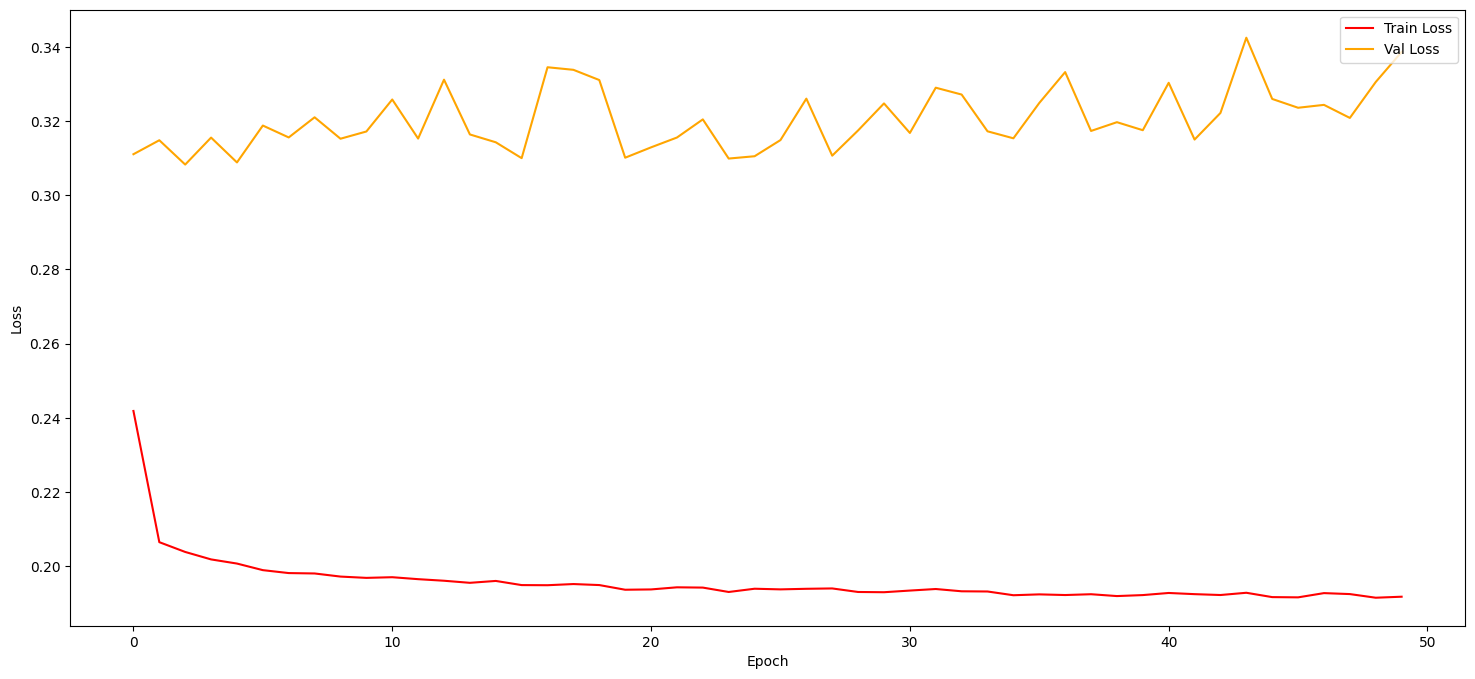

In [48]:
plt.plot(model.history_['loss'], color = 'red')
plt.plot(model.history_['val_loss'], color = 'orange')
plt.legend(['Train Loss', 'Val Loss'], loc='upper right')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

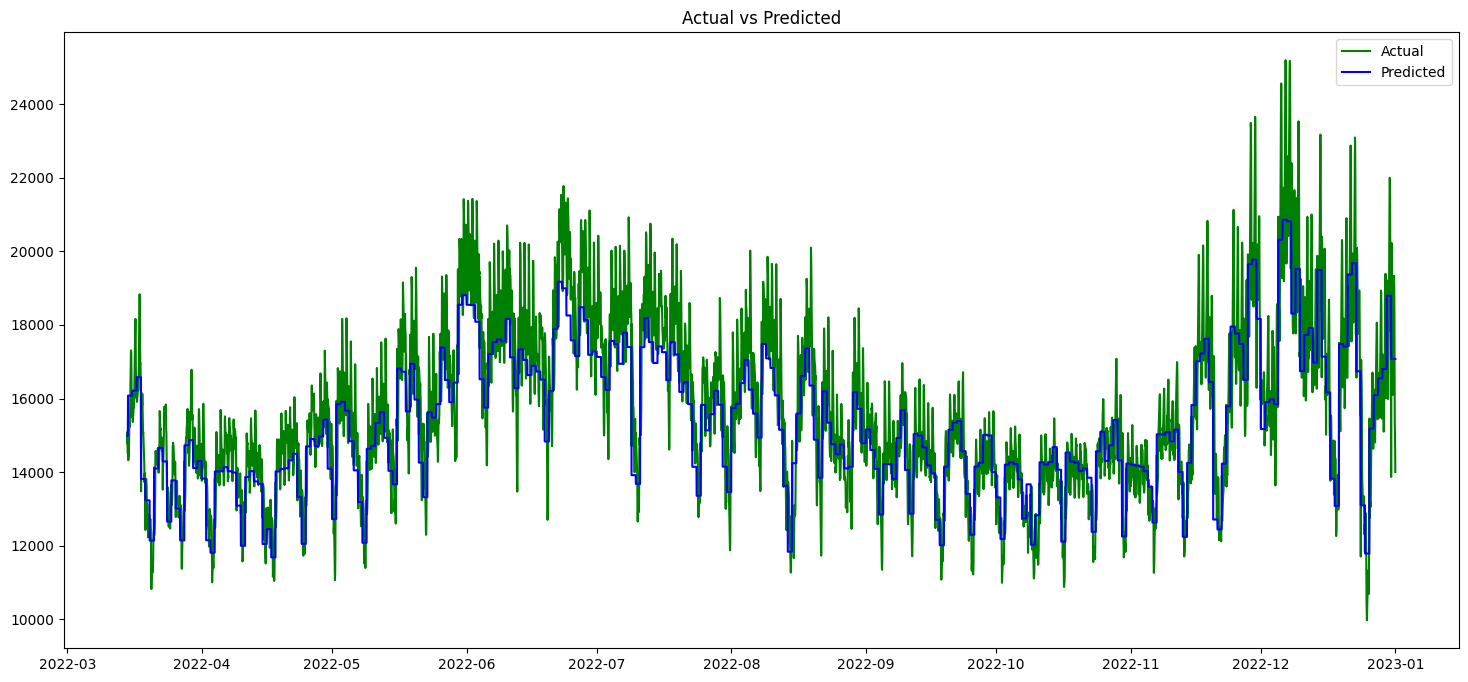

In [49]:
predict = model.predict(X_test)
dem = _reg_aux['demanda']
meanop = dem.mean()
stdop = dem.std()

train_size = int(len(X)*0.80)

y_test_true = y_test*stdop + meanop
test_pred = predict*stdop + meanop
plt.plot(dates[train_size:], y_test_true, color = 'green', label = 'Actual')
plt.plot(dates[train_size:], test_pred, color = 'blue', label = 'Predicted')
plt.title('Actual vs Predicted')
plt.savefig('RNN.pdf')
plt.legend()
plt.show()

## LSTM Multivariate

In [480]:
_lstm = _reg[['demanda','tipo_dia', 'potencia_pico', 'estacion', 'fecha']].set_index('fecha')
_lstm['tipo_dia'] = le.fit_transform(_lstm['tipo_dia'])
_lstm['estacion'] = le.fit_transform(_lstm['estacion'])

_lstm 

,demanda,tipo_dia,potencia_pico,estacion
fecha,,,,
2019-01-01 00:00:00,17133.171814,1,19964.0,3
2019-01-01 01:00:00,13666.088859,1,19964.0,3
2019-01-01 02:00:00,14480.676974,1,19964.0,3
2019-01-01 03:00:00,15127.202594,1,19964.0,3
2019-01-01 04:00:00,15378.775014,1,19964.0,3
...,...,...,...,...
2022-12-31 19:00:00,16868.122635,3,21630.0,3
2022-12-31 20:00:00,15316.944009,3,21630.0,3
2022-12-31 21:00:00,15012.232171,3,21630.0,3


In [481]:
train_size = int(len(_lstm)*0.80)
test_size = len(_lstm) - train_size
train, test = _lstm.iloc[0:train_size, :], _lstm.iloc[train_size+1:len(df), :]
print(train.shape, test.shape)

(28051, 4) (7012, 4)


In [482]:
test_anom = pd.read_csv('~/MEGA/Tesis/Tesis/energy.csv')
y = test_anom[['y_hat_3']].to_numpy()
dates = pd.date_range(test_anom['index'].min(),test_anom['index'].max(), freq = 'H')
X_test_anom = pd.DataFrame(y, index = dates, columns = ['demanda'])

In [483]:
_test = test_anom[test_anom['anomalies']!=0]
_test = _test[['index', 'y_hat_3']].rename(columns = {'index':'x', 'y_hat_3':'y'})

x_values = [i for i in _test['x']]
y_values = [y for y in _test['y']]

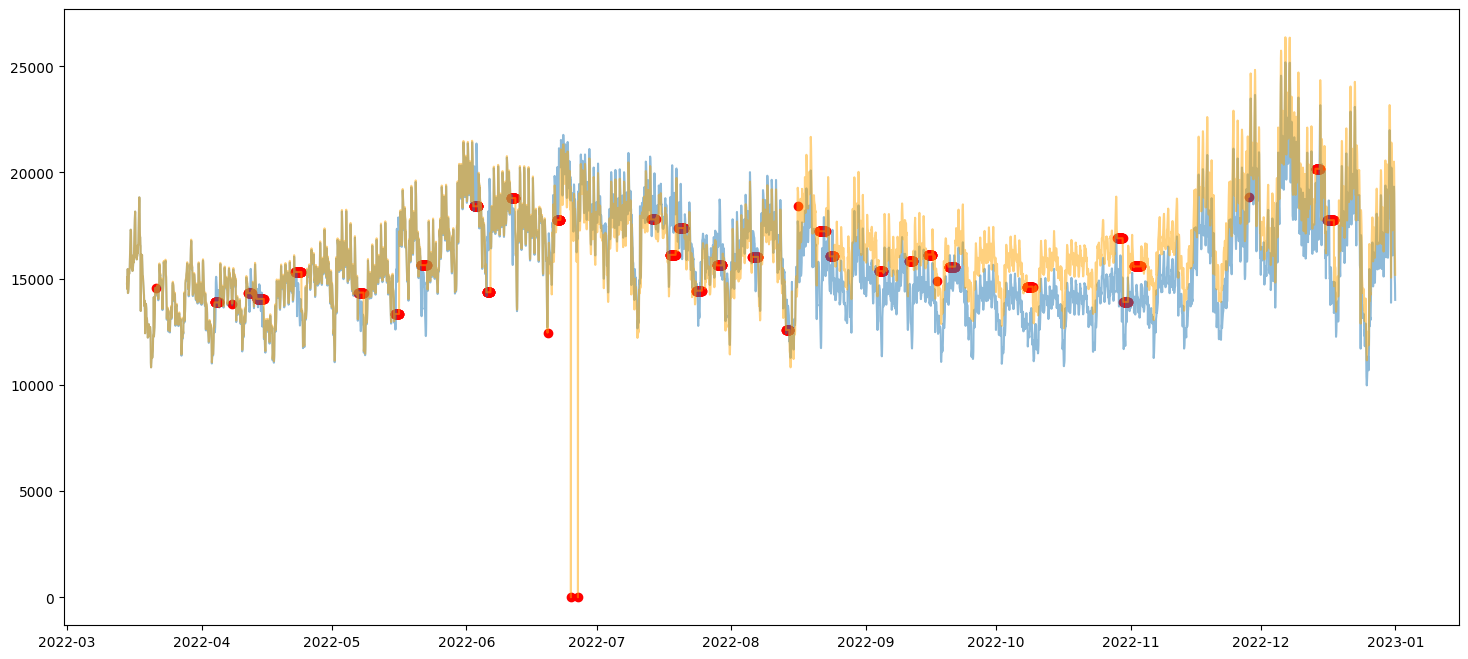

In [484]:
# Create a new figure and axis object
fig, ax = plt.subplots()

# Plot the electric demand data as a line graph
ax.plot(test[['demanda']], alpha =0.5)
ax.plot(X_test_anom['demanda'], alpha = 0.5, color = 'orange')
ax.scatter(_test['x'], _test['y'], color='red')

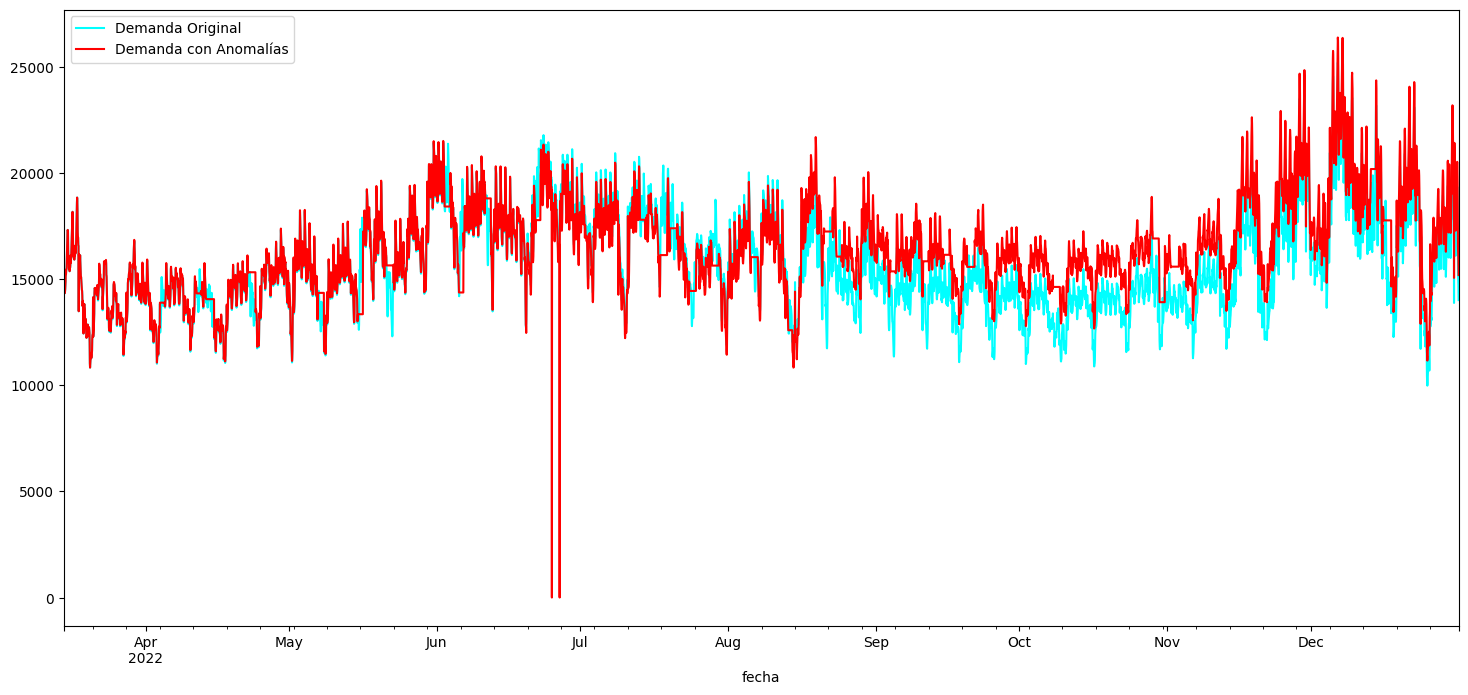

In [485]:
test.demanda.plot(c = 'cyan', label = 'Demanda Original')
X_test_anom.demanda.plot(c = 'red', linestyle = '-', label = 'Demanda con Anomalías')
plt.legend()
plt.savefig('Demandavsanom.pdf')
plt.show()

In [486]:
test['demanda'] = X_test_anom['demanda']

/tmp/ipykernel_116138/3672679005.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['demanda'] = X_test_anom['demanda']


In [487]:
scaler = StandardScaler()
train[train.columns] = scaler.fit_transform(train)
test[test.columns] = scaler.fit_transform(test)

/tmp/ipykernel_116138/2727263797.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[train.columns] = scaler.fit_transform(train)
/tmp/ipykernel_116138/2727263797.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[test.columns] = scaler.fit_transform(test)


In [488]:
def createXY(dataset,n_past):
    dataX = []
    dataY = []
    for i in range(n_past, len(dataset)):
            dataX.append(dataset[i - n_past:i, 0:dataset.shape[1]])
            dataY.append(dataset[i,0])
    return np.array(dataX),np.array(dataY) 

In [489]:
X_train, y_train = createXY(train.values, 24)
X_test, y_test = createXY(test.values, 24)

In [490]:
n_input = 24
features = len(_lstm.columns)

In [464]:
from tensorflow.keras.optimizers import Adam
model=Sequential()
model.add(LSTM(80,return_sequences=True,input_shape=(n_input,features)))
model.add(LSTM(20, return_sequences=True))
model.add(LSTM(10))
model.add(Dropout(0.30))
model.add(Dense(1))
adam = Adam(learning_rate=0.001)
model.compile(loss='mean_squared_error',optimizer=adam, metrics=['mae','mse'])
model.summary()

Model: "sequential_49"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 24, 80)            27200     
                                                                 
 lstm_7 (LSTM)               (None, 24, 20)            8080      
                                                                 
 lstm_8 (LSTM)               (None, 10)                1240      
                                                                 
 dropout_49 (Dropout)        (None, 10)                0         
                                                                 
 dense_190 (Dense)           (None, 1)                 11        
                                                                 
Total params: 36,531
Trainable params: 36,531
Non-trainable params: 0
_________________________________________________________________


In [465]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=0, patience=10)
history = model.fit(X_train, y_train, batch_size=32, epochs=50, validation_split=0.10, shuffle = False, callbacks=[es])

Epoch 1/50
789/789 [==============================] - 67s 65ms/step - loss: 0.2211 - mae: 0.3458 - mse: 0.2211 - val_loss: 0.3455 - val_mae: 0.4292 - val_mse: 0.3455
Epoch 2/50
789/789 [==============================] - 51s 65ms/step - loss: 0.1747 - mae: 0.3100 - mse: 0.1747 - val_loss: 0.2658 - val_mae: 0.3830 - val_mse: 0.2658
Epoch 3/50
789/789 [==============================] - 47s 59ms/step - loss: 0.1498 - mae: 0.2865 - mse: 0.1498 - val_loss: 0.2136 - val_mae: 0.3475 - val_mse: 0.2136
Epoch 4/50
789/789 [==============================] - 46s 58ms/step - loss: 0.1109 - mae: 0.2423 - mse: 0.1109 - val_loss: 0.1240 - val_mae: 0.2508 - val_mse: 0.1240
Epoch 5/50
789/789 [==============================] - 50s 63ms/step - loss: 0.0896 - mae: 0.2134 - mse: 0.0896 - val_loss: 0.0899 - val_mae: 0.2093 - val_mse: 0.0899
Epoch 6/50
789/789 [==============================] - 45s 57ms/step - loss: 0.0799 - mae: 0.1992 - mse: 0.0799 - val_loss: 0.0721 - val_mae: 0.1842 - val_mse: 0.0721
Epoc

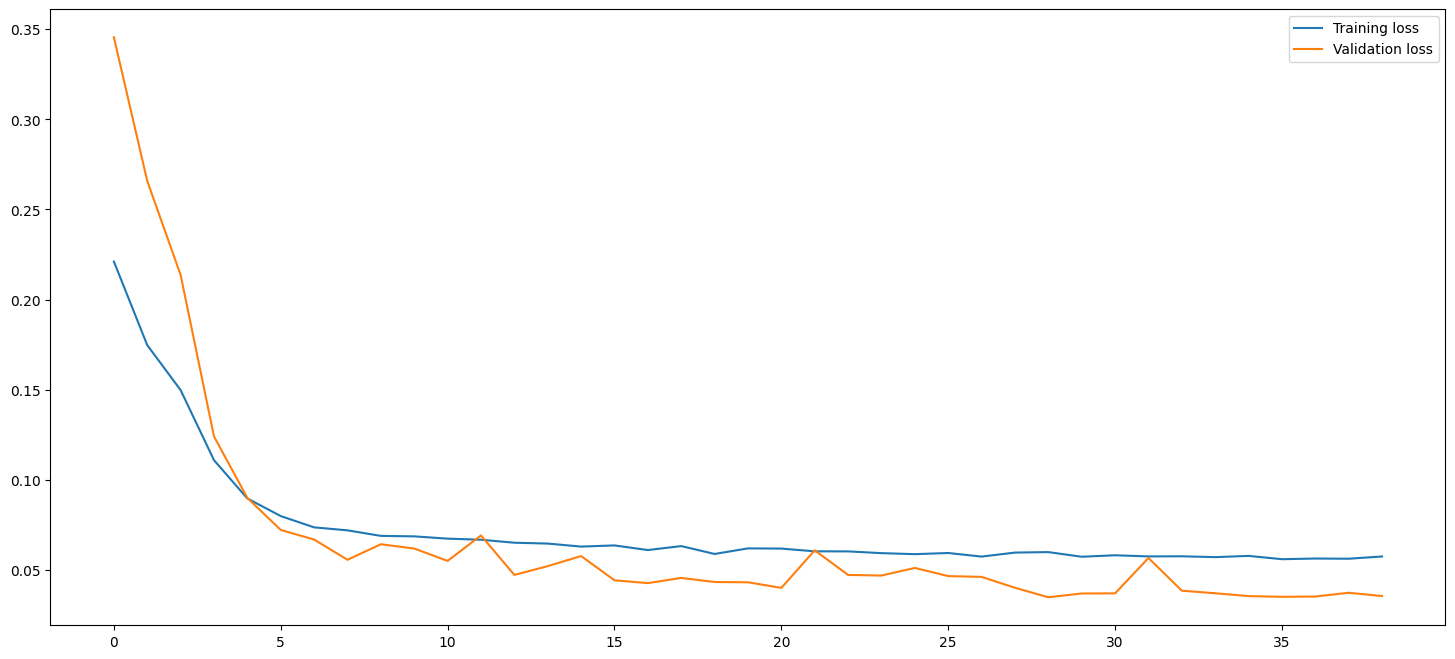

In [466]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.savefig('val_train_loss.pdf')
plt.legend()

In [491]:
testPredict = model.predict(X_test)

219/219 [==============================] - 5s 21ms/step


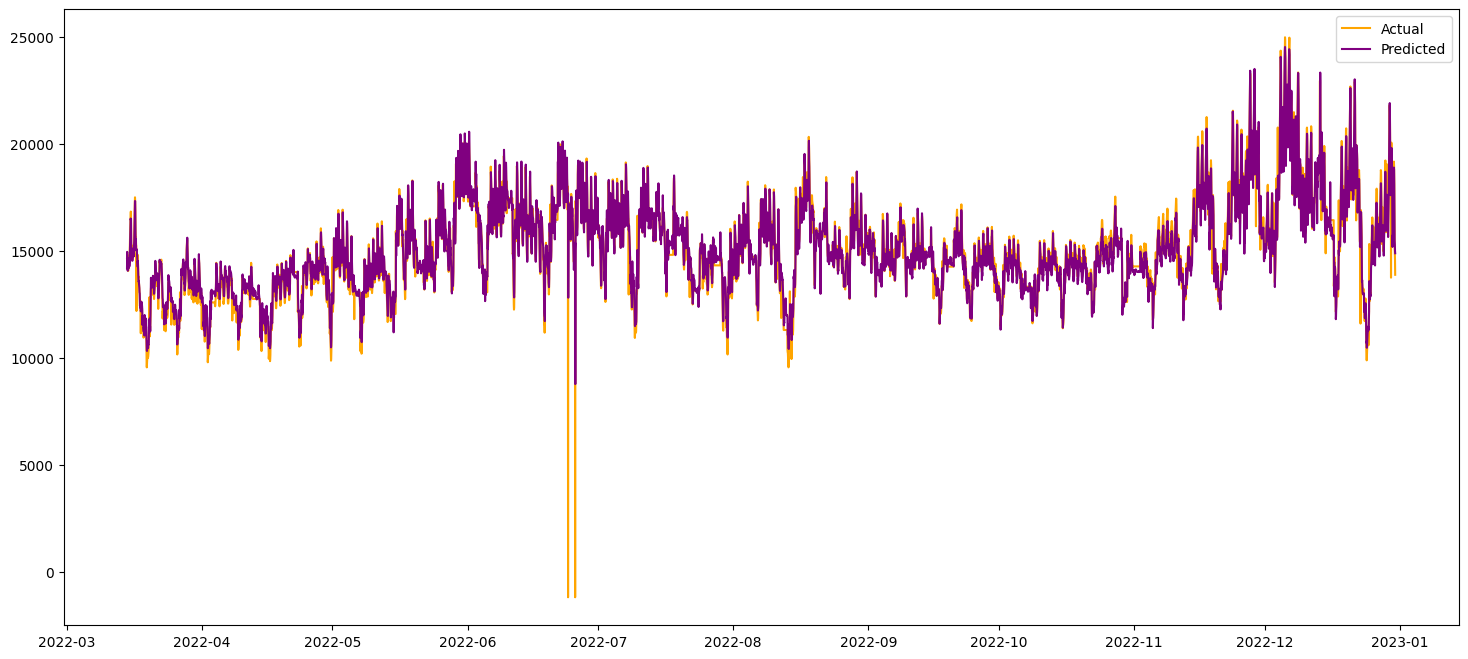

In [492]:
dem = np.array(_reg["demanda"])
dates = pd.date_range(test.index.get_level_values('fecha').min(),test.index.get_level_values('fecha').max(), freq = 'H')

meanop = dem.mean()
stdop = dem.std()

y_test_true = y_test*stdop + meanop
test_pred = testPredict*stdop + meanop

plt.plot(dates[:-24], y_test_true, c = 'orange')
plt.plot(dates[:-24], test_pred, c = 'purple')
plt.legend(['Actual', 'Predicted'])
plt.savefig('predicted_actual.pdf')
plt.show()

In [493]:
y_train = y_train.reshape(-1, 1)
meanop = dem.mean()
stdop = dem.std()
y_train_true = y_train*stdop + meanop
dates_train = pd.date_range(train.index.get_level_values('fecha').min(),train.index.get_level_values('fecha').max(), freq = 'H')
_actual = pd.DataFrame(y_train_true, index = dates_train[:-24],columns = ['Demanda'])

In [494]:
_forecast = pd.DataFrame(test_pred, index = dates[:-24],columns = ['Demanda'])
_forecast.mean()

Demanda    15089.612305
dtype: float32

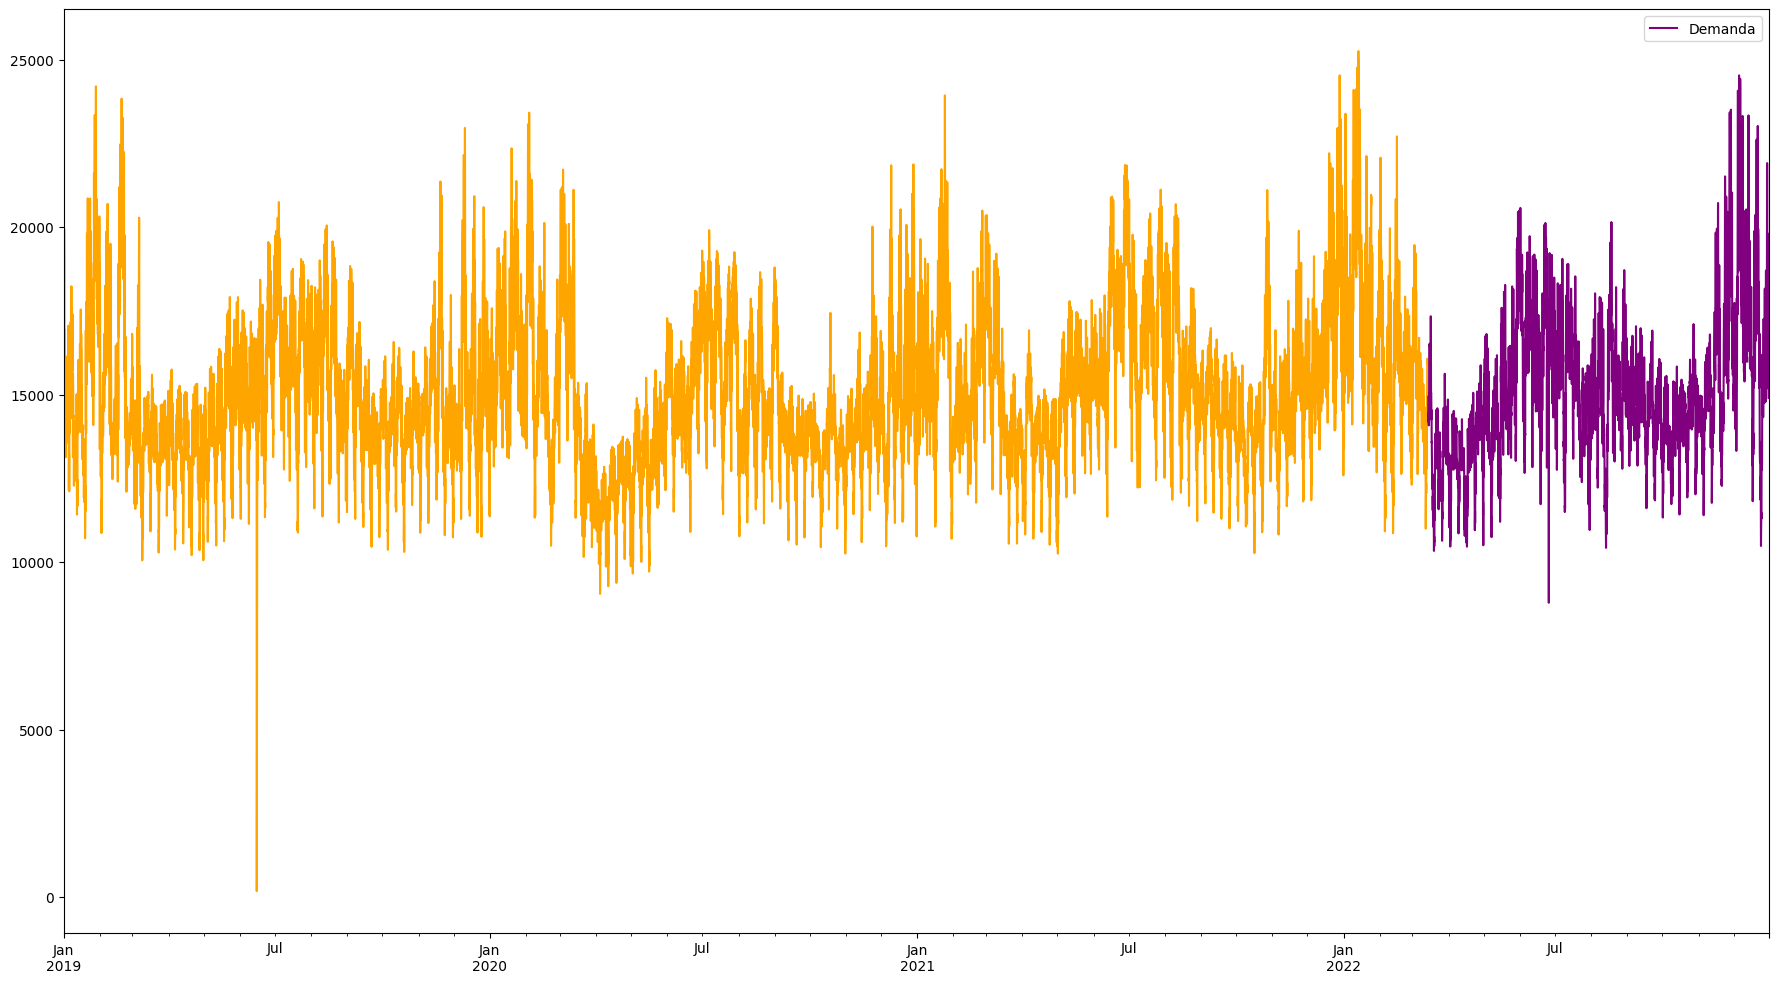

In [495]:
ax = _actual.Demanda.plot(figsize=(22,12), color='orange') 
_forecast.plot(ax=ax, color='purple')
plt.savefig('forecast.pdf')

In [496]:
import nonparametric_dynamic_thresholding as npt 

In [497]:
df_actual = pd.DataFrame(y_test_true, index = dates[:-24], columns=['Actual Values'])

/home/camila/MEGA/Tesis/Tesis/nonparametric_dynamic_thresholding.py:497: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers = outliers.append(pd.Series(outlier_points, index=outlier_indices))


Detected outliers (): 1744


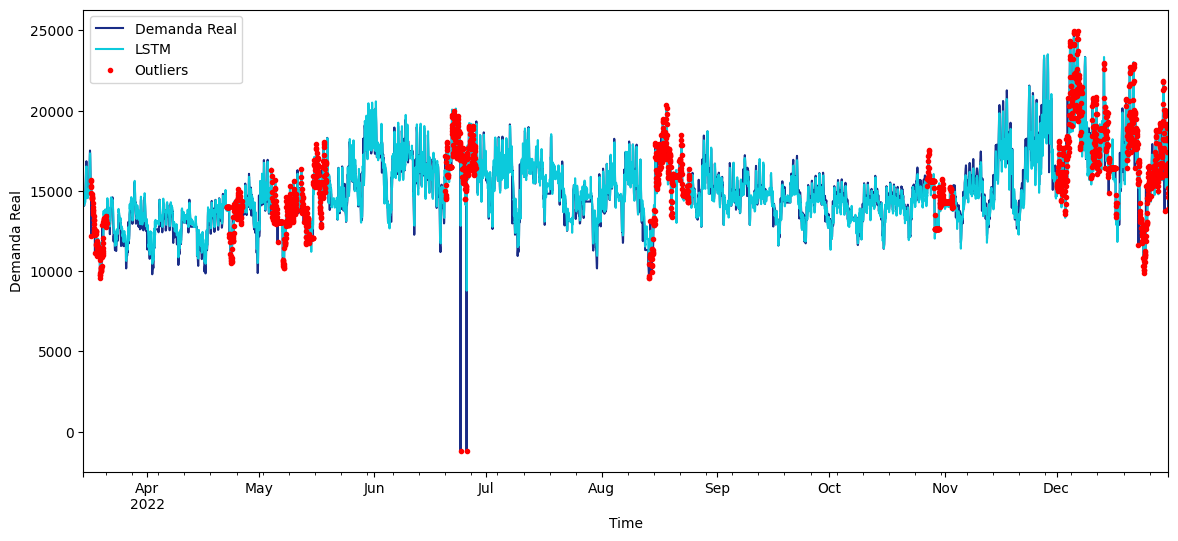

<Figure size 1800x800 with 0 Axes>

In [519]:
pw_anom = npt.detect_anomalies(df_actual.squeeze(), _forecast.squeeze(),\
                     '', 'Demanda Real', 'LSTM', outlier_def='dynamic',window_size = 30, batch_size = 32, num_stds=2, p=0.10, plot_save_path='Detect_anomalies/plot_outliers.png', data_save_path='Detect_anomalies/outliers.csv')

In [540]:
_out = pd.read_csv('Detect_anomalies/outliers.csv').rename(columns = {'Unnamed: 0':'index'})

In [541]:
test_anom = test_anom[test_anom['anomalies'] != 0]
len(test_anom)

897

In [542]:
_df1 =test_anom.merge(_out, on = 'index', how = 'outer')
_tot = len(_df1[_df1['anomalies'].notnull()])
_threshold = len(_df1[(_df1['Outlier']==True)&(_df1['anomalies'].notnull())])
print(_threshold/_tot)

0.36454849498327757


In [545]:
_all_1 = len(_df1[_df1['anomalies']==1])
_true_positives = len(_df1[(_df1['Outlier']==True)&(_df1['anomalies']==1)])
_false_negatives = len(_df1[(_df1['Outlier']==False)&(_df1['anomalies']==1)])

_recall = _true_positives/(_true_positives+_false_negatives) #Número correcto de anomalías sobre todas las anomalías del dataset
_tot = _true_positives/_all_1

print(f'Recall: {_recall} \n {_tot}')

Recall: 1.0 
 1.0


In [546]:
_all_1 = len(_df1[_df1['anomalies']==2])
_true_positives = len(_df1[(_df1['Outlier']==True)&(_df1['anomalies']==2)])
_false_negatives = len(_df1[(_df1['Outlier']==False)&(_df1['anomalies']==2)])

_recall = _true_positives/(_true_positives+_false_negatives) #Número correcto de anomalías sobre todas las anomalías del dataset
_tot = _true_positives/_all_1

print(f'Recall: {_recall} \n {_tot}')

Recall: 0.3644544431946007 
 0.3644544431946007


In [534]:
_true_positives = len(_df1[(_df1['Outlier']==True)&(_df1['anomalies']==3)])
_false_negatives = len(_df1[(_df1['Outlier']==False)&(_df1['anomalies']==3)])

_recall = _true_positives/(_true_positives+_false_negatives) #Número correcto de anomalías sobre todas las anomalías del dataset

print(f'Recall: {_recall}')

Recall: 0.0


In [535]:
_true_positives = len(_df1[(_df1['Outlier']==True)&(_df1['anomalies']==4)])
_false_negatives = len(_df1[(_df1['Outlier']==False)&(_df1['anomalies']==4)])

_recall = _true_positives/(_true_positives+_false_negatives) #Número correcto de anomalías sobre todas las anomalías del dataset

print(f'Recall: {_recall}')

Recall: 0.25


In [524]:
_true_positives = len(_df1[(_df1['Outlier']==True)&(_df1['anomalies'].notnull())])
_true_negatives = len(_df1[(_df1['Outlier']==False)&(_df1['anomalies'].isnull())])
_false_positives = len(_df1[(_df1['Outlier']==True)&(_df1['anomalies'].isnull())])
_false_negatives = len(_df1[(_df1['Outlier']==False)&(_df1['anomalies'].notnull())])

_precision = _true_positives/(_true_positives+_false_positives) #Número correcto de anomalías de todas las que reportó
_recall = _true_positives/(_true_positives+_false_negatives) #Número correcto de anomalías sobre todas las anomalías del dataset
_fpr = _false_positives/(_false_positives+_true_negatives) #Número que reportó como anomalías y no lo eran, sobre el conjunto total de no anomalías
_f1 = 2*(_precision*_recall/(_precision+_recall))

print(f' Precision: {_precision}\n Recall: {_recall}\n FPR: {_fpr} \n F1 Score {_f1}')

 Precision: 0.1875
 Recall: 0.36454849498327757
 FPR: 0.23263831883106223 
 F1 Score 0.24763347216963272
